# Evaluation of introductory workshop "building medical apps"

In context of 3rd [EU CodeWeek](http://codeweek.eu) 2015 at [Maastricht University Medical Center](http://www.mumc.nl/en), The Netherlands. 

Programming was done in XCode 7 with the Swift 2 programming language.

Author: [Pieter Kubben, MD, PhD](http://dign.eu)

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
pd.options.display.float_format = '{:,.1f}'.format

In [3]:
df = pd.read_excel('data/intro_med_apps.xlsx', sheetname='Data')
df.head(1)

,Profession,Sex,Age,Skills before workshop,Skills after workshop,Programming before workshop,Programming after workshop,Importance before workshop,Importance after workshop,Development without support,Development with support,Recommendation,Feedback,Unnamed: 13
0,Science,Female,31-40,1,2,2,2,2.0,4,2,4,Ja,Zeer interessante cursus met hulpvaardige doce...,nan


## Descriptive statistics

In [4]:
df.describe()

,Skills before workshop,Skills after workshop,Programming before workshop,Programming after workshop,Importance before workshop,Importance after workshop,Development without support,Development with support,Unnamed: 13
count,14.0,14.0,14.0,14.0,13.0,14.0,14.0,14.0,0.0
mean,1.1,2.5,1.8,2.7,2.3,3.5,2.3,3.3,nan
std,0.4,0.5,0.8,0.7,0.9,0.9,0.9,0.9,nan
min,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,nan
25%,1.0,2.0,1.0,2.0,2.0,3.0,2.0,3.0,nan
50%,1.0,2.5,2.0,3.0,2.0,3.0,2.0,3.0,nan
75%,1.0,3.0,2.0,3.0,3.0,4.0,3.0,4.0,nan
max,2.0,3.0,3.0,4.0,4.0,5.0,4.0,5.0,nan


## Demographics of participants

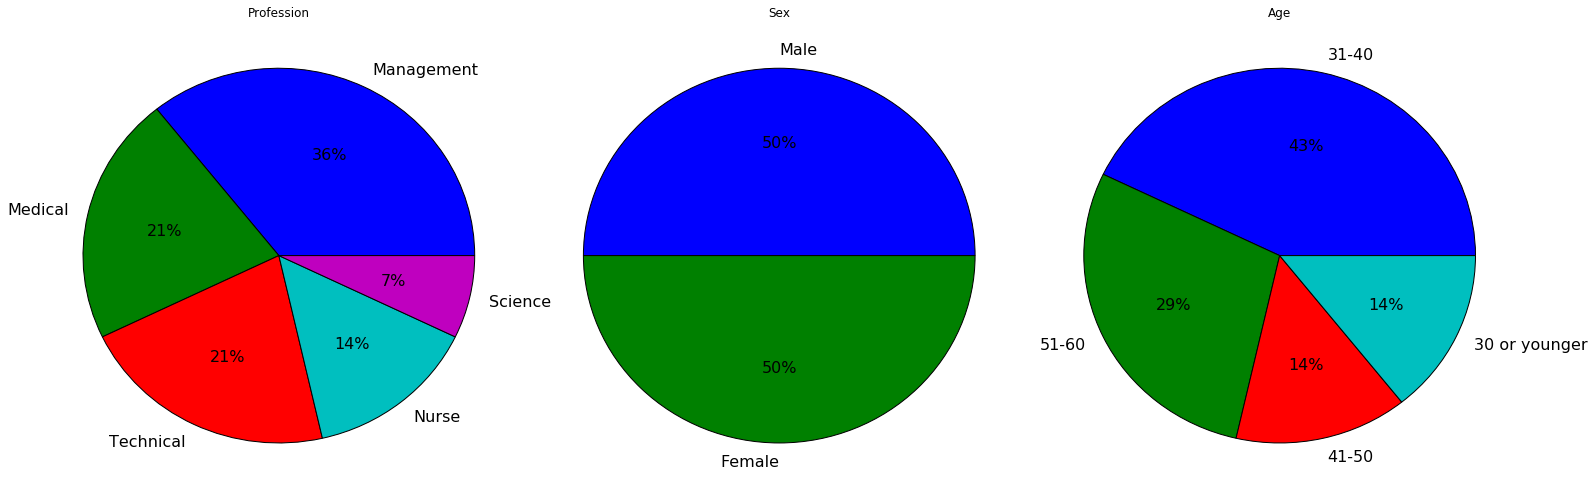

In [10]:
df_demographics = df.iloc[:,0:3]
titles = list(df_demographics)

fig, axes = plt.subplots(1, len(titles))
fig_heigth = 7
fig_width = fig_heigth * len(titles)

for i, title in enumerate(titles):
    pie = df[title].value_counts().plot(kind='pie', figsize=(fig_width, fig_heigth), ax=axes[i], title=title, 
        fontsize=16, autopct='%1.0f%%')
    pie.set_ylabel('')
    
plt.tight_layout()

# plt.savefig('fig_demographics.png', dpi=300, bbox_inches='tight')

## Pre-post workshop comparisons

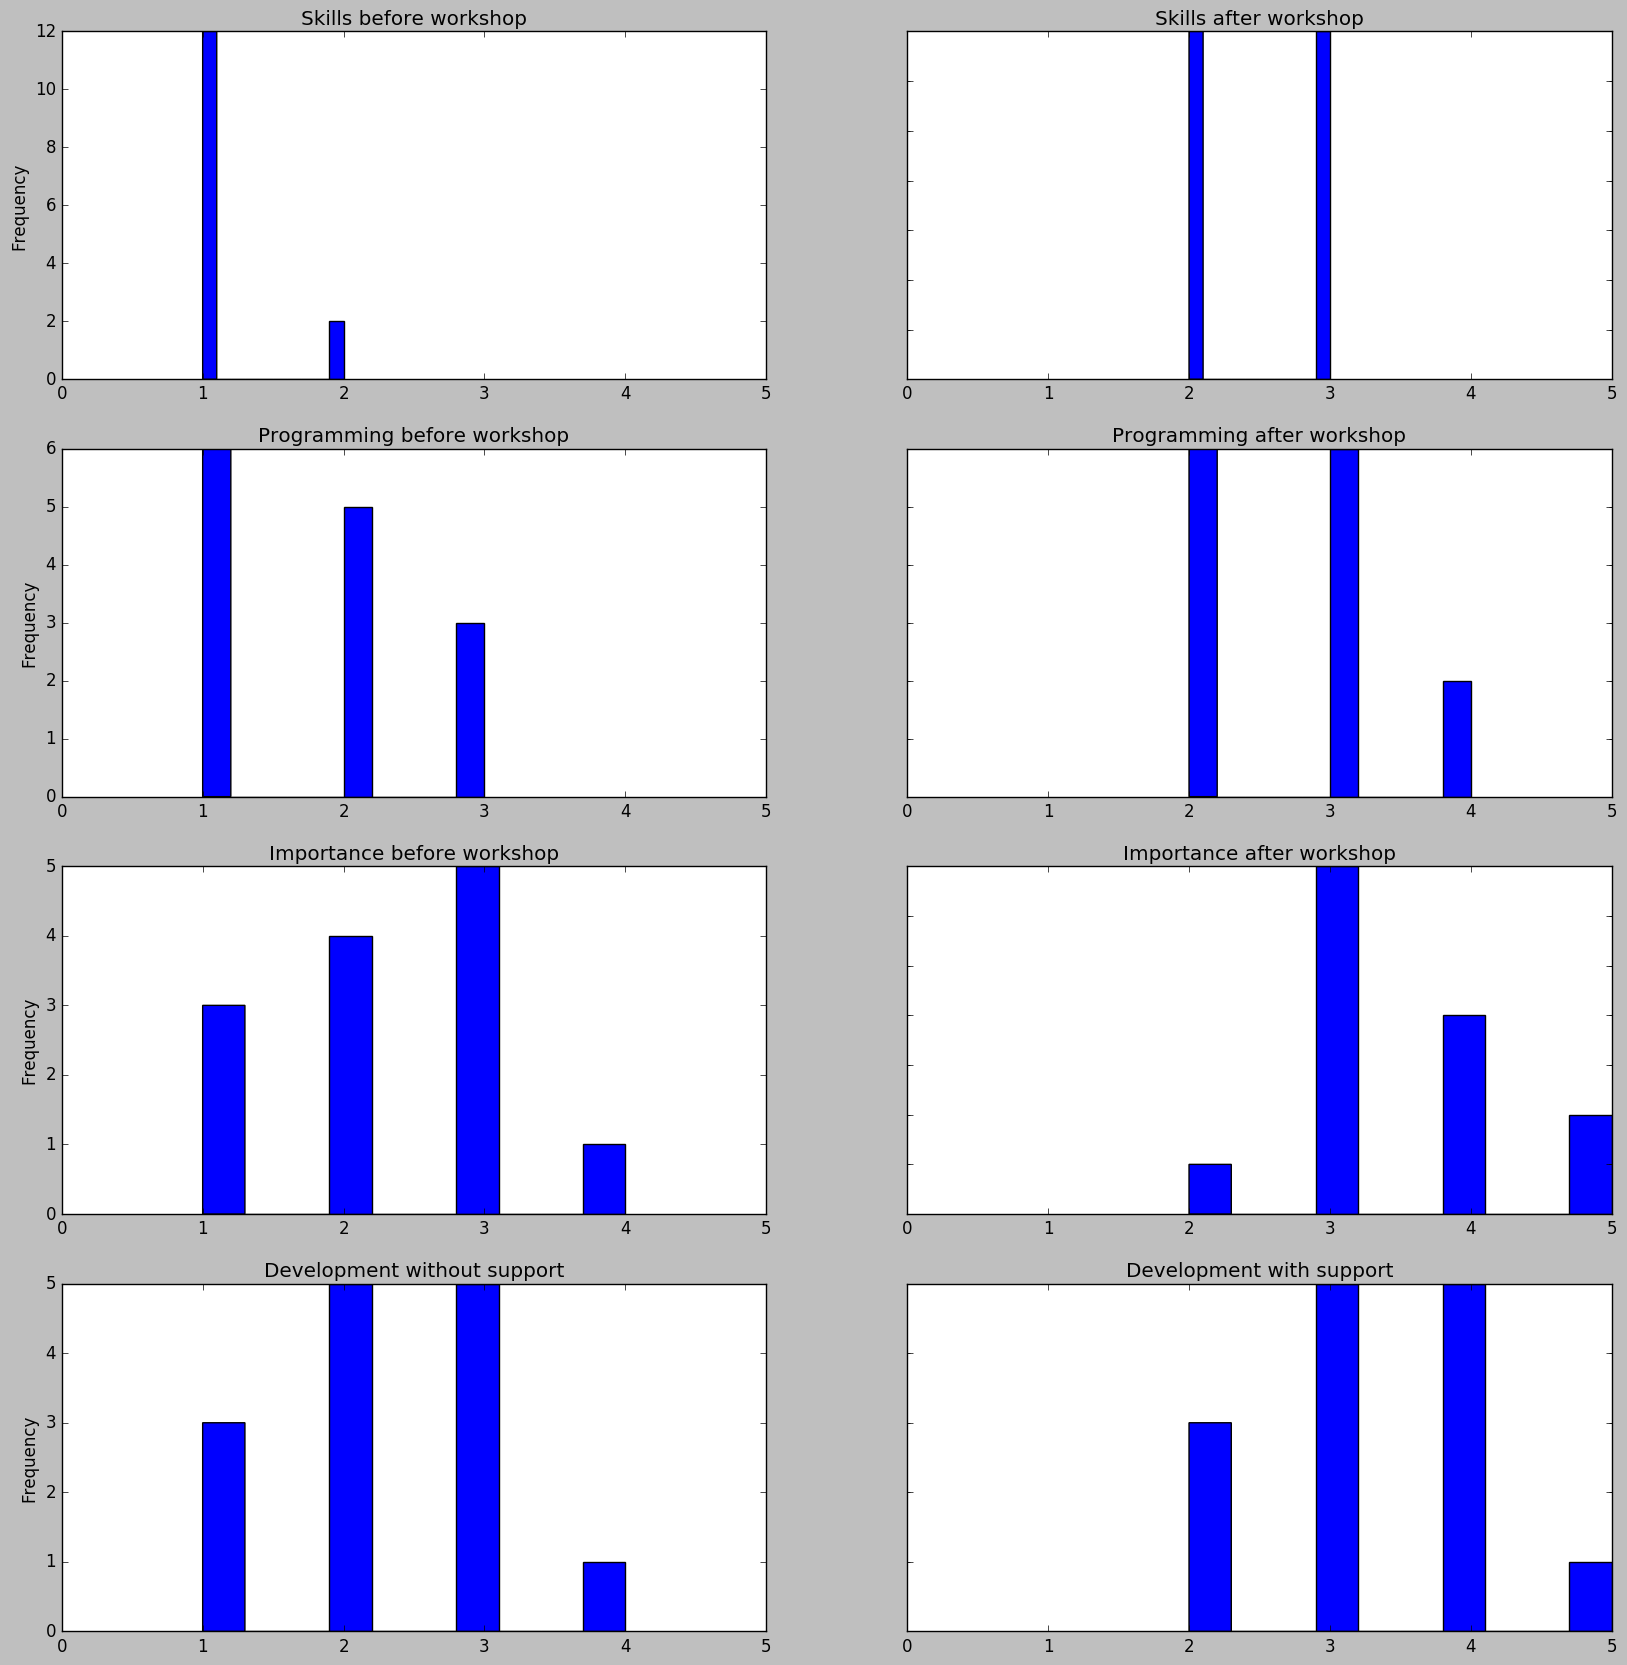

In [51]:
# Plot histograms to check normal distribution
df_comparisons = df.iloc[:,3:11]
fig, axes = plt.subplots(len(list(df_comparisons))/2,2)

for i, title in enumerate(list(df_comparisons)):
    column = 0 if i%2 == 0 else 1
    df_comparisons[title].plot(kind='hist', xlim=(0,5), figsize=(20,20), ax=axes[i/2,column], title=title, sharey=True)
    
# plt.savefig('fig_histograms.png', dpi=300)

In [33]:
df_mean_median = pd.DataFrame({'Mean': df_comparisons.mean(),
              'Mean std': df_comparisons.std(),
              'Median': df_comparisons.median(),
              'Median IQR': df_comparisons.quantile(.75) - df_comparisons.quantile(.25)})
df_mean_median

,Mean,Mean std,Median,Median IQR
Skills before workshop,1.1,0.4,1.0,0.0
Skills after workshop,2.5,0.5,2.5,1.0
Programming before workshop,1.8,0.8,2.0,1.0
Programming after workshop,2.7,0.7,3.0,1.0
Importance before workshop,2.3,0.9,2.0,1.0
Importance after workshop,3.5,0.9,3.0,1.0
Development without support,2.3,0.9,2.0,1.0
Development with support,3.3,0.9,3.0,1.0


In [7]:
diff_programming = df_comparisons.iloc[:,1] - df_comparisons.iloc[:,0]
diff_app_building = df_comparisons.iloc[:,3] - df_comparisons.iloc[:,2]
diff_importance = df_comparisons.iloc[:,5] - df_comparisons.iloc[:,4]
diff_legal = df_comparisons.iloc[:,7] - df_comparisons.iloc[:,6]

df_diff = pd.DataFrame({
    'Programming' : diff_programming,
    'App building' : diff_app_building,
    'Importance' : diff_importance,
    'Legal aspects' : diff_legal
})

pd.DataFrame({
    'Mean improve': df_diff.mean(),
    'Mean improve std': df_diff.std(),
    'Median improve': df_diff.median(),
    'Median improve IQR': df_diff.quantile(.75) - df_diff.quantile(.25)
 })

,Mean improve,Mean improve std,Median improve,Median improve IQR
App building,0.9,0.5,1.0,0.0
Importance,1.2,0.9,1.0,2.0
Legal aspects,1.0,0.7,1.0,0.0
Programming,1.4,0.5,1.0,1.0


### Boxplots of pre-post comparisons

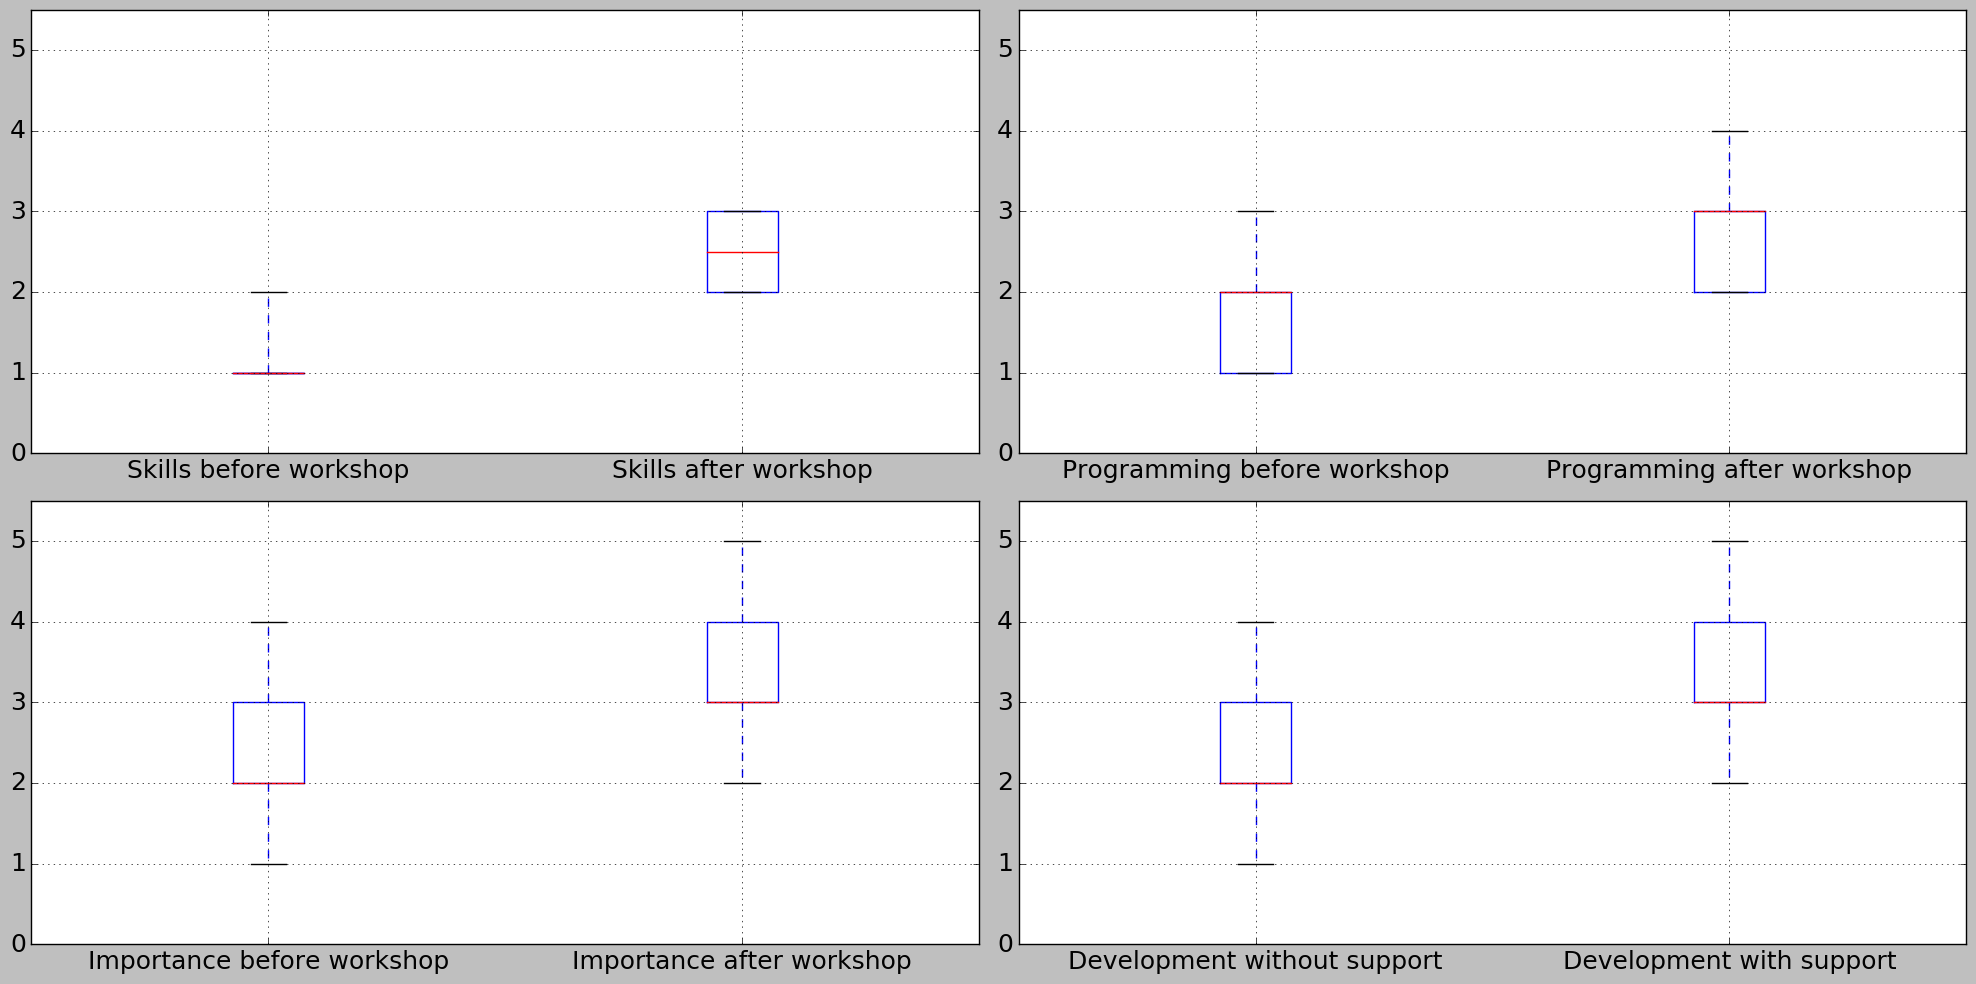

In [57]:
fig, axes = plt.subplots(2,2)
titles = list(df_comparisons)
i = 0

while i < len(titles):
    df_comparisons[[titles[i], titles[i+1]]].plot(kind='box', figsize=(20,10), ylim=(0,5.5), ax=axes[i/4,i%4/2],
            fontsize = 18, grid=True)
    i += 2
plt.tight_layout()

# plt.savefig('fig_comparisons.png', dpi=300)

### Hypothesis testing

#### Paired t test

*Valid unless severe non-normal distribution*

More info: http://www.biostathandbook.com/pairedttest.html

In [97]:
for i in range(0,7,2):
    print list(df_comparisons)[i], ':', stats.ttest_rel(df_comparisons.iloc[:,i+1], df_comparisons.iloc[:,i])

Skills before workshop : Ttest_relResult(statistic=10.212193147844831, pvalue=1.409449881428046e-07)
Programming before workshop : Ttest_relResult(statistic=7.3202025828291477, pvalue=5.8299747757734459e-06)
Importance before workshop : Ttest_relResult(statistic=nan, pvalue=nan)
Development without support : Ttest_relResult(statistic=5.5075705472861021, pvalue=0.00010084267272620214)


#### Wilcoxon signed rank test

*Non-parametric, but seems to require n > 20*

More info: http://www.biostathandbook.com/wilcoxonsignedrank.html

In [98]:
for i in range(0,7,2):
    print list(df_comparisons)[i], ':', stats.wilcoxon(df_comparisons.iloc[:,i+1], df_comparisons.iloc[:,i])

Skills before workshop : WilcoxonResult(statistic=0.0, pvalue=0.00063629914124020508)
Programming before workshop : WilcoxonResult(statistic=0.0, pvalue=0.00078911298901562993)
Importance before workshop : WilcoxonResult(statistic=0.0, pvalue=0.0040165146600327469)
Development without support : WilcoxonResult(statistic=0.0, pvalue=0.002136306416781164)
